# Datos prueba Accelerometro Frenadas carro Spark GT T=50mS

In [1]:
from PIL import Image
from scipy.misc import toimage
from scipy.misc import imshow
 
import numpy as np
from numpy import genfromtxt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import figure
from matplotlib import cm
import matplotlib.image as mpimg
from scipy import stats
import operator as op
import pandas as pd
from ast import literal_eval
from mpl_toolkits.mplot3d import Axes3D
import math
import sys
from numpy import genfromtxt


In [24]:
# acceSpkrt = pd.read_csv("laneChange_spark.log") 
acceSpkrt = pd.read_csv("brake_spark.log")

acceSpkrtVal = acceSpkrt.values

In [31]:
print(acceSpkrt[123:][:7].aX)
aX_t = acceSpkrt.aX
gX_t = acceSpkrt.gX
print(aX_t.values)
print(gX_t.values)
print(acceSpkrt.values)

123     60
124     74
125     81
126     59
127     16
128    113
129     76
Name: aX, dtype: int64
[  89   83   92 ... -202 -186 -187]
[116 130 118 ... 125 119 132]
[[   89   211  7955 ...  -926 -9609     0]
 [   83   227  7956 ... -1003 -9623     0]
 [   92   192  8042 ...  -958 -9563     0]
 ...
 [ -202   340  7974 ...  1534 -9738     0]
 [ -186   316  8048 ...  1504 -9721     0]
 [ -187   302  8118 ...  1520 -9724     0]]


In [33]:
acceSpkrtArr = acceSpkrt.values
print(acceSpkrtArr.shape)

(19559, 10)


In [34]:
Xaxes = np.arange(acceSpkrtArr.shape[0])
print(acceSpkrtArr[:,1])

[211 227 192 ... 340 316 302]


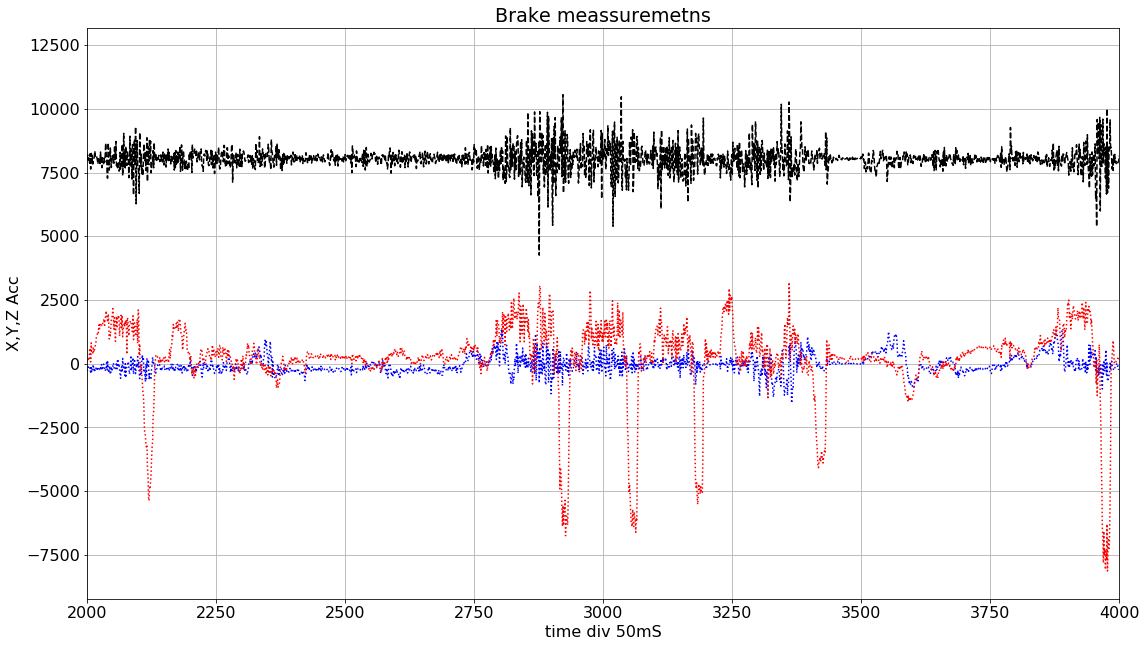

In [43]:
# Accelerometer Plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Xaxes),
         np.squeeze(acceSpkrtArr[:,0]),
         'b:',
         np.squeeze(Xaxes),
         np.squeeze(acceSpkrtArr[:,1]),
         'r:',
         np.squeeze(Xaxes),
         np.squeeze(acceSpkrtArr[:,2]),
         'k--',)


plt.ylabel('X,Y,Z Acc')
plt.xlabel('time div 50mS')
plt.title("Brake meassuremetns")
plt.grid()
plt.xlim(2000, 4000)
# plt.savefig('rastriginSAnnealNrm_10d.pdf', format='pdf')
plt.show()

# T = 100 mS

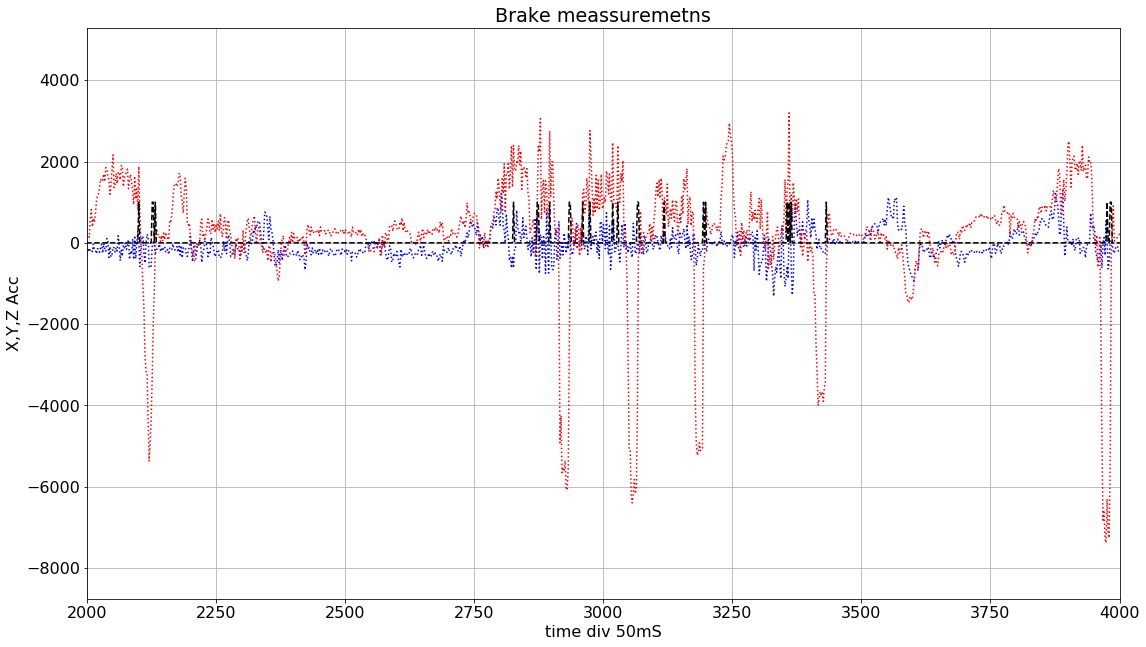

In [36]:
# Half sampling period from 50 to 100mS
XaxesHalf_indeces = np.arange(0,acceSpkrtArr.shape[0],2)
acceSpkrtArrHalf_indeces = acceSpkrtArr[::2]

stdMatrixShift_Half_indeces = np.roll(acceSpkrtArrHalf_indeces, 1, axis=0)
stdMatrixDiif_Half_indeces = (acceSpkrtArrHalf_indeces - stdMatrixShift_Half_indeces)/0.1
stdEventDetection_Half_indeces = stdMatrixDiif_Half_indeces >= 10000
stdEventDetection_Half_indeces = stdEventDetection_Half_indeces.astype(int)*1000
# Accelerometer Plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(XaxesHalf_indeces),
         np.squeeze(acceSpkrtArrHalf_indeces[:,0]),
         'b:',
         np.squeeze(XaxesHalf_indeces),
         np.squeeze(acceSpkrtArrHalf_indeces[:,1]),
         'r:',
         np.squeeze(XaxesHalf_indeces),
         np.squeeze(stdEventDetection_Half_indeces[:,1]),
         'k--',)


plt.ylabel('X,Y,Z Acc')
plt.xlabel('time div 50mS')
plt.title("Brake meassuremetns")
plt.grid()
plt.xlim(2000, 4000)
# plt.savefig('rastriginSAnnealNrm_10d.pdf', format='pdf')
plt.show()

## T = 100mS 7s Windowing

In [49]:
print(XaxesHalf_indeces.shape)
print(acceSpkrtArrHalf_indeces.shape)
XFRAME_ELEMENTS = 70
XMAX_FRAME_COUNTER = acceSpkrtArrHalf_indeces.shape[0] - XFRAME_ELEMENTS
def get_FrameStatistics(wholeMatrix, frameIndex):
    FRAME_ELEMENTS = 70
    MAX_FRAME_COUNTER = wholeMatrix.shape[0] - FRAME_ELEMENTS
    if frameIndex < MAX_FRAME_COUNTER:
        frameMatrix = wholeMatrix[frameIndex:(frameIndex + FRAME_ELEMENTS)]
        meanArray = np.mean(frameMatrix, axis=0)
        medianArray = np.median(frameMatrix, axis=0)
        stdArray = np.std(frameMatrix, axis=0)
        
    else:
        print("ERR")
    
    return meanArray,medianArray,stdArray


# Frame elements offset matrixess
meanMatrix = np.zeros((XFRAME_ELEMENTS,10))
medianMatrix = np.zeros((XFRAME_ELEMENTS,10))
stdMatrix = np.zeros((XFRAME_ELEMENTS,10))
stdMatrixShift = np.zeros((XFRAME_ELEMENTS,10))
for i in range (XMAX_FRAME_COUNTER):
    sys.stdout.write("\r Iteration " + str(i))
    sys.stdout.flush()

    meanArray,medianArray,stdArray = get_FrameStatistics(acceSpkrtArrHalf_indeces, i)
    
    meanMatrix = np.append(meanMatrix,meanArray.reshape((1, 10)),axis = 0)
    medianMatrix = np.append(medianMatrix,medianArray.reshape((1, 10)), axis = 0)
    stdMatrix = np.append(stdMatrix,stdArray.reshape((1, 10)), axis = 0)
    
stdMatrixShift = np.roll(stdMatrix, 1, axis=0)
stdMatrixDiif = (stdMatrix - stdMatrixShift)/0.1
stdEventDetection = stdMatrixDiif >= 500
# Event sample permanence
stdEventDetectionInt = stdEventDetection.astype(int)
stdEventDetectionInt_1 = np.roll(stdEventDetectionInt, -1, axis=0)
stdEventDetectionInt_2 = np.roll(stdEventDetectionInt, -2, axis=0)
stdEventDetectionInt_3 = np.roll(stdEventDetectionInt, -3, axis=0)
stdEventDetectionInt = stdEventDetectionInt*stdEventDetectionInt_1*stdEventDetectionInt_2;
stdEventDetectionInt = stdEventDetectionInt * 1000

print(meanMatrix.shape)
print(medianMatrix.shape)
print(stdMatrix.shape)


(9780,)
(9780, 10)
 Iteration 9709(9780, 10)
(9780, 10)
(9780, 10)


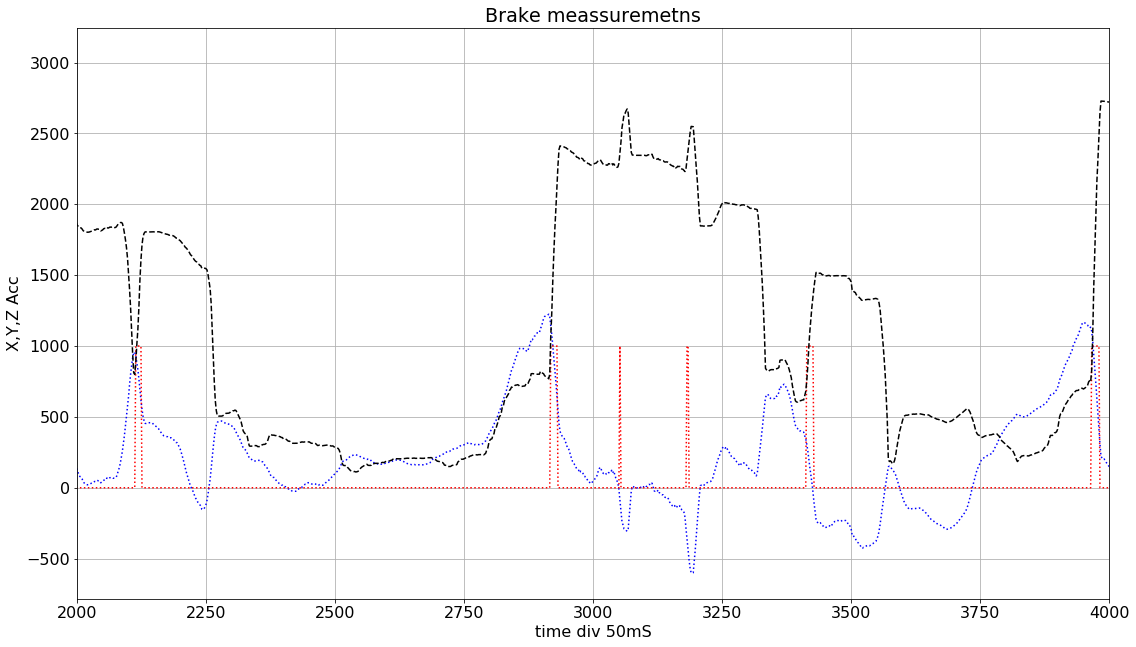

In [50]:
# Accelerometer Plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(XaxesHalf_indeces),
         np.squeeze(meanMatrix[:,1]),
         'b:',
         np.squeeze(XaxesHalf_indeces),
         np.squeeze(stdEventDetectionInt[:,1]),
         'r:',
         np.squeeze(XaxesHalf_indeces),
         np.squeeze(stdMatrix[:,1]),
         'k--',)


plt.ylabel('X,Y,Z Acc')
plt.xlabel('time div 50mS')
plt.title("Brake meassuremetns")
plt.grid()
plt.xlim(2000, 4000)
# plt.xlim(3045, 3062)
# plt.savefig('rastriginSAnnealNrm_10d.pdf', format='pdf')
plt.show()

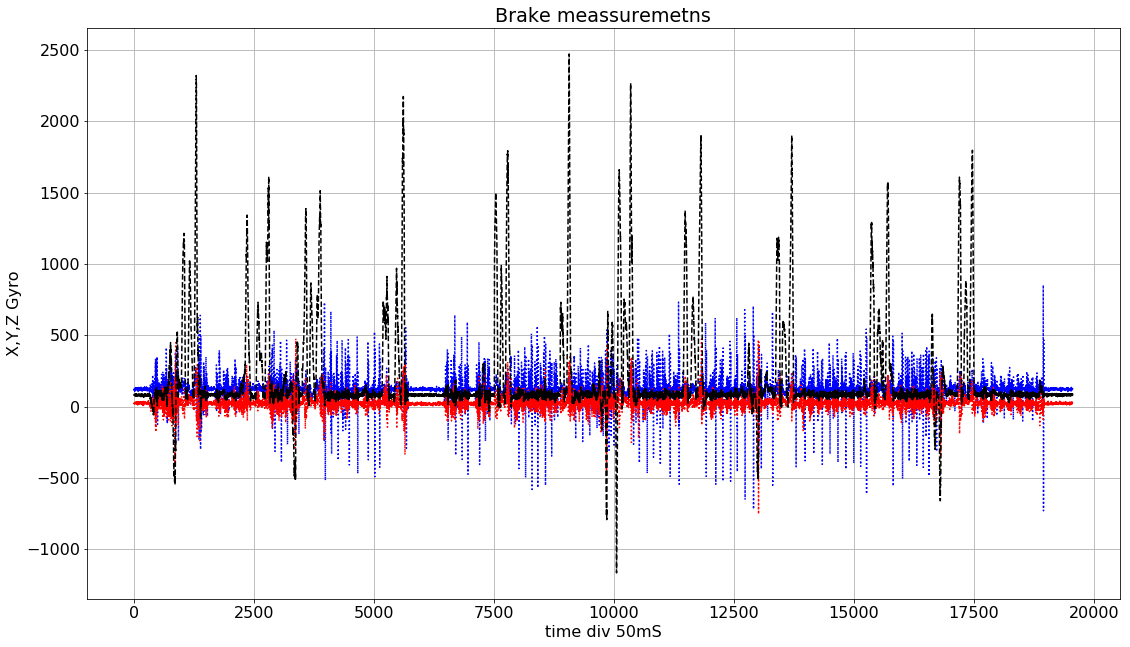

In [180]:
# Giroscope Plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Xaxes),
         np.squeeze(acceSpkrtArr[:,3]),
         'b:',
         np.squeeze(Xaxes),
         np.squeeze(acceSpkrtArr[:,4]),
         'r:',
         np.squeeze(Xaxes),
         np.squeeze(acceSpkrtArr[:,5]),
         'k--',)


plt.ylabel('X,Y,Z Gyro')
plt.xlabel('time div 50mS')
plt.title("Brake meassuremetns")
plt.grid()
# plt.xlim(0, 2500)
# plt.savefig('rastriginSAnnealNrm_10d.pdf', format='pdf')
plt.show()

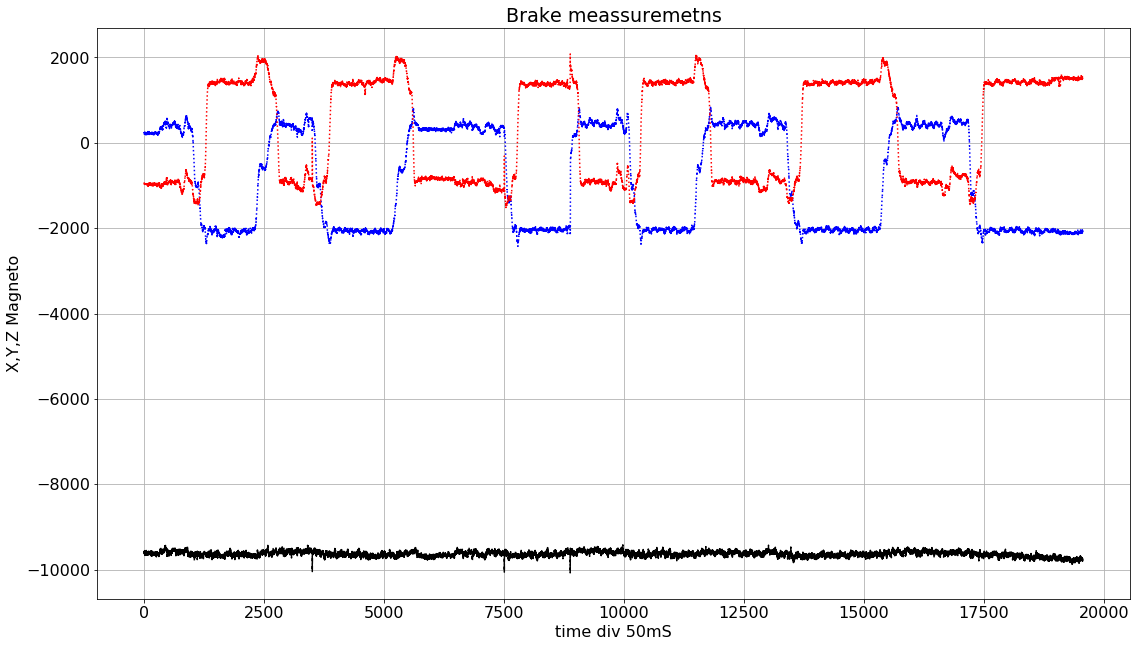

In [49]:
# Magnetometer Plot
plt.rcParams.update({'font.size': 16})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.plot(np.squeeze(Xaxes),
         np.squeeze(acceSpkrtArr[:,6]),
         'b:',
         np.squeeze(Xaxes),
         np.squeeze(acceSpkrtArr[:,7]),
         'r:',
         np.squeeze(Xaxes),
         np.squeeze(acceSpkrtArr[:,8]),
         'k--',)


plt.ylabel('X,Y,Z Magneto')
plt.xlabel('time div 50mS')
plt.title("Brake meassuremetns")
plt.grid()

# plt.savefig('rastriginSAnnealNrm_10d.pdf', format='pdf')
plt.show()